# Predicting Diabetes
## Import Libraries


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import plotly.plotly as py
import plotly.graph_objs as go

## Load and review data

In [2]:
df = pd.read_csv("D:/Work Docs/AI/Demos/Test3/data/pima-data.csv") # load Pima data

In [3]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [4]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.
    
    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
        
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                               0------------------------->1
                                               Expect a darkred line running from top to bottom right
    """
    
    corr = df.corr() # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr) # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

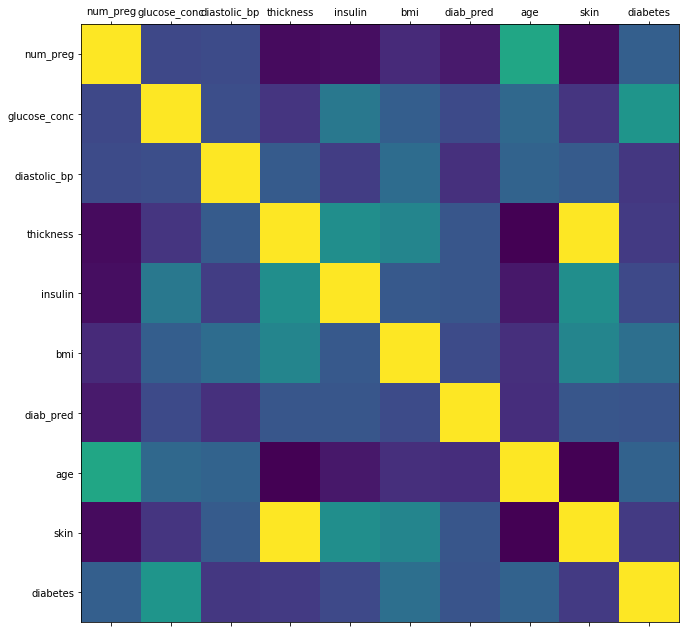

In [5]:
plot_corr(df)

In [6]:
del df['skin']

## Check Data Types

In [7]:
diabetes_map = {True:1, False:0}

In [8]:
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [9]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Spliting the data
70% for training, 30% for testing

In [10]:
from sklearn.cross_validation import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values # predictor feature columns (8 X m)
y = df[predicted_class_names].values # predicted class (1=true, 0=false) column (1 X m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
# test_size = 0.3 is 30%, 42 is the answer to everything

C:\Users\ronglu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We check to ensure we have the desired 70% train, 30% test split of the data

In [11]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index))*100))
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index))*100))

69.92% in training set
30.08% in test set


## Post-split Data Preparation

### Impute with the mean

In [12]:
from sklearn.preprocessing import Imputer

# Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

## Training Initial Algorithm = Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

### Performance on Training data

In [14]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print("")

Accurary: 0.7542



### Performance on Testing data

In [15]:
# predict values using the training data
nb_predict_test = nb_model.predict(x_test)

# import the performance metrics library
# from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print("")

Accurary: 0.7359



### Metrics

In [16]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.78      0.79       151
          1       0.61      0.65      0.63        80

avg / total       0.74      0.74      0.74       231



## Retrain =  Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42) # Create random forest object

rf_model.fit(x_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Performance on Training data

In [18]:
# predict values using the training data
rf_predict_train = rf_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))
print("")

Accurary: 0.9870



### Performance on Testing data

In [19]:
# predict values using the testing data
rf_predict_test = rf_model.predict(x_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print("")

Accurary: 0.7100



### Metrics

In [20]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[121  30]
 [ 37  43]]

Classification Report
             precision    recall  f1-score   support

          0       0.77      0.80      0.78       151
          1       0.59      0.54      0.56        80

avg / total       0.70      0.71      0.71       231



## Retrain = Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

lf_model = LogisticRegression(C=0.7, class_weight="balanced", random_state=42)
lf_model.fit(x_train, y_train.ravel())

LogisticRegression(C=0.7, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Performance on Training data

In [22]:
# predict values using the training data
lf_predict_train = lf_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, lf_predict_train)))
print("")

Accurary: 0.7765



### Performance on Testing data

In [23]:
# predict values using the training data
lf_predict_test = lf_model.predict(x_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lf_predict_test)))
print("")

Accurary: 0.7056



### Metrics

In [24]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lf_predict_test))

Confusion Matrix
[[105  46]
 [ 22  58]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.56      0.72      0.63        80

avg / total       0.73      0.71      0.71       231



### Setting regularization parameter

first max value of 0.738 occurred at C=0.300


Text(0,0.5,'recall score')

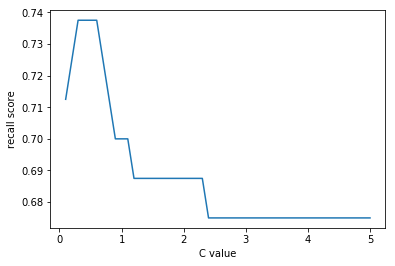

In [26]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores =[], []

C_val = C_start
best_recall_score = 0
while(C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test=lr_model_loop.predict(x_test)
    recall_score=metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if(recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("first max value of {0:.3f} occurred at C={1:.3f}".format(best_recall_score, best_score_C_val))

## Retrain with class_weight='balanced' and C=0.3

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=best_score_C_val, class_weight="balanced", random_state=42)
lr_model.fit(x_train, y_train.ravel())

LogisticRegression(C=0.30000000000000004, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Performance on Testing data

In [28]:
# predict values using the training data
lr_predict_test = lr_model.predict(x_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print("")

Accurary: 0.7143



### Metrics

In [29]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, lr_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test,lr_predict_test))

Confusion Matrix
[[106  45]
 [ 21  59]]

Classification Report
             precision    recall  f1-score   support

          0       0.83      0.70      0.76       151
          1       0.57      0.74      0.64        80

avg / total       0.74      0.71      0.72       231

0.7375
